<a href="https://colab.research.google.com/github/Edgar-IAH/IA-Grupo-45/blob/main/Semana_8/SVM_Equipo45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

* Eduardo Aldair Ahumada García Jurado - A01422929
* Edgar Rodolfo Escobar Gomez - A01793900
* Walter André Hauri Rosales - A01794237
* Héctor Salvador Montañez Alvarez - A01332665
* Jaime Andres Palacios Campaña - A01794023

## *Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados al inicio del curso. Se trabajará con el conjunto de datos conocido como "Australian credit approval", un problema de clasificación que ya has estudiado en semanas previas y cuyos datos puedes encontrar en la siguiente liga del repositorio de la UCI:*##
##*https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29*
## *El objetivo es determinar si se autoriza una tarjeta de crédito dada cierta información del solicitante. En la página de la UCI encuentras mayor información sobre el problema.*

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from math import isnan
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import power_transform, quantile_transform
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import seaborn as sns 
import warnings

%matplotlib inline

# **Ejercicio-1.** 
## *Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0.*

In [2]:
url = "https://raw.githubusercontent.com/Edgar-IAH/IA-Grupo-45/cb8335f587eb54109eae098c8ce8dd7bd9e0bec6/Semana_8/australian.csv"
datos = pd.read_csv(url)
datos.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X = datos.iloc[:, :-1]
Y = datos.iloc[:, -1]

X["A4"] = X["A4"].replace(3, X["A4"].mode()[0])
X["A4"].value_counts()


2    527
1    163
Name: A4, dtype: int64

- La clase con valor 3 de la variable A4 tiene únicamente dos ocurrencias por lo que decidimos reemplazarla por la moda. Esto solucionó problemas que teníamos con los algoritmos al quedar una clase en un conjunto y no en el otro. A pesar de que se estratificaron, el número de ocurrencias era muy bajo.

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.15, random_state=0
)


In [5]:
print(X.shape)
print(Y.shape)


(690, 14)
(690,)


# **Ejercicio-2.**
## *Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. Utiliza un Pipeline para evitar el filtrado de información.*

In [6]:
X_train.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
242,1,49.50,7.585,2,3,5,7.585,1,1,15,1,2,0,5001
18,1,20.00,1.250,1,4,4,0.125,0,0,0,0,2,140,5
490,1,27.58,2.040,1,6,4,2.000,1,1,3,1,2,370,561
475,1,23.58,0.460,1,9,4,2.625,1,1,6,1,2,208,348
55,1,27.83,1.500,2,9,4,2.000,1,1,11,1,2,434,36


In [7]:
X_test.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
14,1,58.58,2.710,2,8,4,2.415,0,0,0,1,2,320,1
586,1,43.25,25.210,2,11,8,0.210,1,1,1,0,2,760,91
140,1,19.67,10.000,1,4,8,0.835,1,0,0,1,2,140,1
492,1,51.83,2.040,1,1,1,1.500,0,0,0,0,2,120,2
350,0,25.17,2.875,2,14,8,0.875,1,0,0,0,2,360,1


In [8]:
Y_test.head()


14     0
586    0
140    0
492    0
350    1
Name: A15, dtype: int64

- Se comprueba que no hay valores nulos en el dataset

In [9]:
datos.isna().sum()


A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

In [10]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [11]:
for v in datos.columns:  # datos.columns:
    print(v)
    print(datos[v].unique())
    print("-----")


A1
[1 0]
-----
A2
[22.08 22.67 29.58 21.67 20.17 15.83 17.42 58.67 27.83 55.75 33.5  41.42
 20.67 34.92 58.58 48.08 18.92 20.   22.42 28.17 19.17 41.17 41.58 19.5
 32.75 22.5  33.17 30.67 23.08 27.   20.42 52.33 42.83 74.83 25.   39.58
 47.75 47.42 23.17 22.58 26.75 63.33 23.75 20.75 24.5  16.17 29.5  52.83
 32.33 21.08 19.   27.58 40.   37.33 42.5  56.75 43.17 18.5  40.83 42.
 21.5  31.25 27.25 48.75 30.42 29.42 28.25 40.25 36.5  25.58 29.83 32.17
 25.17 35.17 18.58 39.92 23.42 37.58 24.75 47.   34.17 22.17 27.75 42.75
 28.67 36.25 18.17 21.25 38.92 31.83 17.33 39.08 38.67 27.67 22.25 49.83
 38.25 47.33 35.75 33.58 34.08 22.75 40.58 38.75 57.08 22.   58.33 28.92
 46.   21.   20.83 24.58 26.5  40.92 38.33 19.58 39.25 25.75 46.08 19.67
 18.83 64.08 16.5  68.67 76.75 15.92 34.83 45.17 15.17 52.5  18.   37.5
 47.83 33.08 43.08 34.5  18.25 17.92 18.42 62.5  23.5  35.25 56.83 53.33
 42.17 33.75 25.67 24.33 23.33 37.17 26.25 29.75 23.   17.25 29.25 28.58
 34.58 18.75 17.08 16.08 32.92 20.33 

In [12]:
datos["A4"].value_counts()


2    525
1    163
3      2
Name: A4, dtype: int64

In [13]:
for v in X_train.columns:  # datos.columns:
    print(v)
    print(X_train[v].unique())
    print("-----")


A1
[1 0]
-----
A2
[49.5  20.   27.58 23.58 27.83 52.83 17.67 22.75 23.17 54.42 28.17 73.42
 23.25 19.58 38.75 18.92 27.17 53.92 43.25 13.75 18.83 34.58 55.92 27.33
 48.33 48.25 20.75 34.25 18.5  26.75 31.57 22.5  42.25 33.58 28.92 19.17
 44.25 27.25 74.83 22.92 29.83 37.5  26.58 26.67 24.5  38.67 35.   27.42
 27.67 33.17 41.75 42.83 35.25 33.08 25.08 30.17 22.   41.92 29.17 20.42
 60.58 20.67 33.75 24.33 24.83 47.83 26.17 23.08 28.67 25.92 19.5  42.
 31.67 16.5  28.42 23.33 31.08 31.83 21.33 48.08 34.83 36.17 17.42 25.42
 30.42 34.42 44.33 19.   28.33 29.75 39.08 27.75 20.5  18.58 24.75 60.08
 26.33 45.83 24.08 32.33 50.25 30.83 38.17 17.25 19.67 24.58 26.83 58.42
 32.67 22.67 38.58 23.42 18.17 15.75 56.42 62.5  41.17 16.08 21.83 17.83
 34.17 38.92 32.   47.17 23.75 80.25 22.58 22.17 36.67 42.17 22.08 41.58
 67.75 22.25 39.83 34.92 29.58 21.5  49.83 25.   37.33 48.17 16.   27.
 33.67 17.92 31.42 21.58 43.17 48.58 21.92 21.67 40.92 37.17 40.58 49.17
 28.75 29.92 23.5  57.42 30.58 56.58 

In [14]:
for v in X_test.columns:  # datos.columns:
    print(v)
    print(X_test[v].unique())
    print("-----")


A1
[1 0]
-----
A2
[58.58 43.25 19.67 51.83 25.17 17.92 18.08 22.58 20.67 56.5  22.67 20.42
 35.75 16.33 22.75 35.17 21.5  27.83 34.83 34.75 24.08 22.92 22.83 36.5
 26.17 23.   29.5  18.83 22.42 36.67 35.25 25.42 18.17 31.25 23.5  31.57
 37.58 25.08 28.08 18.42 21.17 32.33 32.25 22.25 32.17 26.75 71.58 41.5
 33.5  60.92 45.33 33.75 38.92 35.42 62.75 47.67 34.   41.   27.75 51.58
 28.5  18.   22.08 22.17 20.33 26.25 18.75 39.58 31.92 59.67 51.92 18.25
 25.33 19.33 25.58 24.5  28.17 39.42 32.83 33.   43.08 16.92 24.42 50.08
 16.5  30.   21.08 33.17 23.25 34.67]
-----
A3
[ 2.71  25.21  10.     2.04   2.875 10.21   6.75  10.75   5.29  16.
  7.    10.5    2.415  0.21  11.5    4.5    6.     1.5    1.25  15.
  0.875 11.585  2.29   4.25  12.5    0.75   0.46   4.415  2.5   11.25
  3.25   3.165  0.54   0.915  2.46   4.085  1.     2.835  4.     0.
  2.54   9.25   0.25   3.5    0.165  1.46   1.54   1.75   5.     3.
  2.75  12.     0.04   0.585  2.335 12.125  7.5    0.415 13.915  4.46
  2.     6.5  

In [15]:
datos.describe()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [16]:
# imputacion por moda - Categóricos
datos_cat = ["A1", "A4", "A5", "A8", "A9", "A11", "A12"]

# imputacion por moda - Continuos
datos_cnt = ["A2", "A3", "A7", "A10", "A13", "A14"]

# imputacion por moda - Binarios
datos_bin = ["A15"]


- Analizamos las distribuciones de las variables

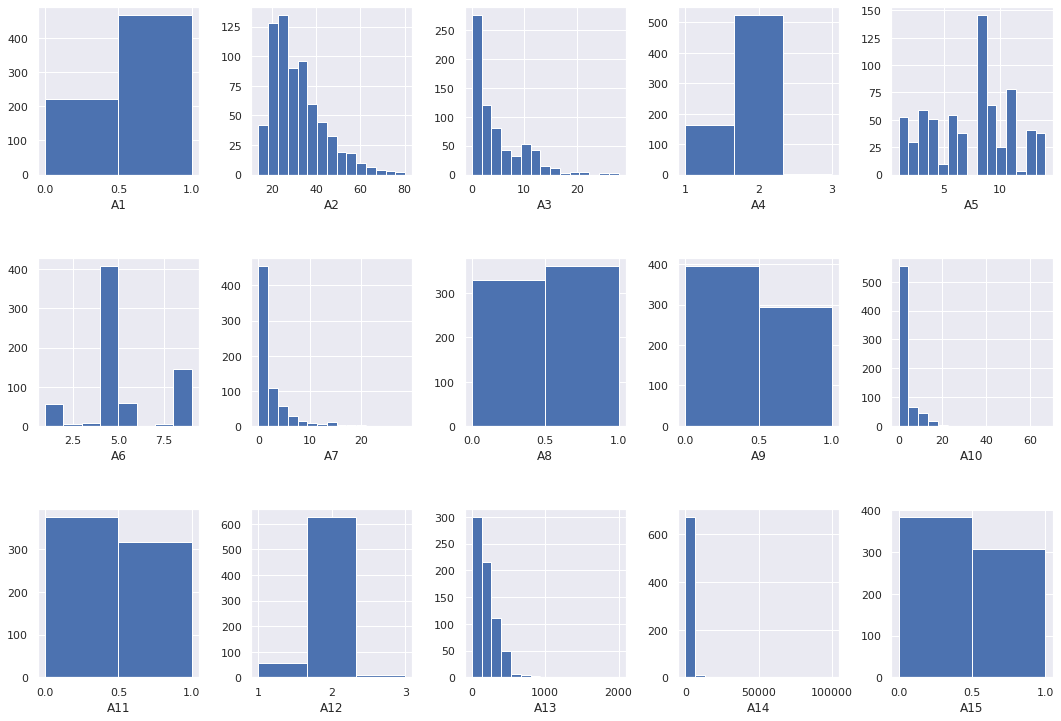

In [17]:
# Tamaño de la gráfica
sns.set(rc={"figure.figsize": (15, 10)})
fig, axes = plt.subplots(3, 5)

# Espacio entre gráficas
fig.tight_layout(h_pad=5.0)

# Grafica los histogramas uno por uno
for k in range(0, 15):
    plt.subplot(3, 5, k + 1)
    # Número de valores diferentes.
    buckets = datos.iloc[:, k].nunique()

    if buckets > 10:
        buckets = 15

    # Crea el histograma
    datos.iloc[:, k].hist(bins=buckets)
    # Nombra el eje X de acuerdo a la columna que está siendo visualizada
    plt.xlabel(datos.columns[k])
# Despliega la figura con las 10 gráficas
plt.show()


- Probamos transformaciones a las variables numéricas. Introducimos una nueva transformación que parece dar muy buenos rtesultados con datos bastante dispersos como es el caso de las variables de entrada A13 y A14.

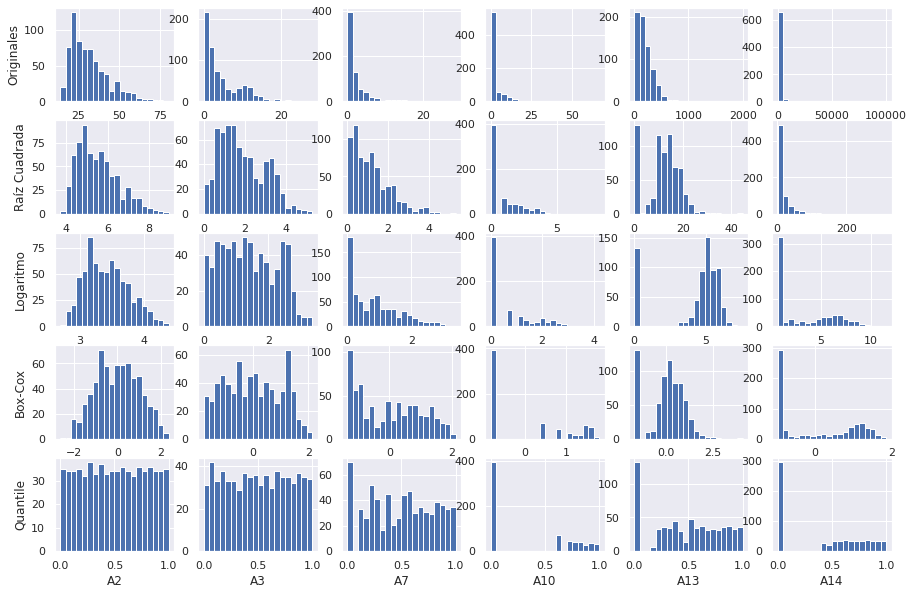

In [18]:
# Mediante histogramas revisamos la distribución de frecuencias para encontrar
# cual daría la mejor simetría pos-transformación de las variable numéricas

#Con esto ignoramos los warnings del número de quantiles:
warnings.filterwarnings('ignore')

sns.set(rc={"figure.figsize": (15, 10)})
fig, axes = plt.subplots(5, 6)

datos_num_transf = datos_cnt

for k in range(0, 6):
    # Datos originales ---------------------------------------------------------
    plt.subplot(5, 6, k + 1)
    Transf0 = (
        datos[datos_num_transf[k]].values.reshape(-1, 1)
    )  # Se asigna a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf0, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Originales")

    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5, 6, k + 7)
    Transf1 = np.sqrt(
        Transf0
    )  # Se debe aplica la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf1, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Raíz Cuadrada")

    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5, 6, k + 13)
    Transf2 = np.log1p(
        Transf0
    )  # Se aplica el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf2, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Logaritmo")

    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5, 6, k + 19)

    Transf4 = power_transform(
        (datos[datos_num_transf[k]].values.reshape(-1, 1)) + 1, method="box-cox"
    )  #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf4, bins=20
    )  #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])

    if k == 0:
        plt.ylabel("Box-Cox")

    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5, 6, k + 25)

    Transf5 = quantile_transform(
        Transf0, random_state=0
    )  #  En esta línea se debe aplicar la transformación Quantile a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf5, bins=20
    )  #  En este línea agrega el comando para obtener el histograma de Transf5 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])

    if k == 0:
        plt.ylabel("Quantile")

#Restaura los warnings
warnings.resetwarnings()


- Observamos un boxplot de las variables numéricas. Nótense los buenos resultados que arroja la transformación Quantile sobre las variable A13 y A14.


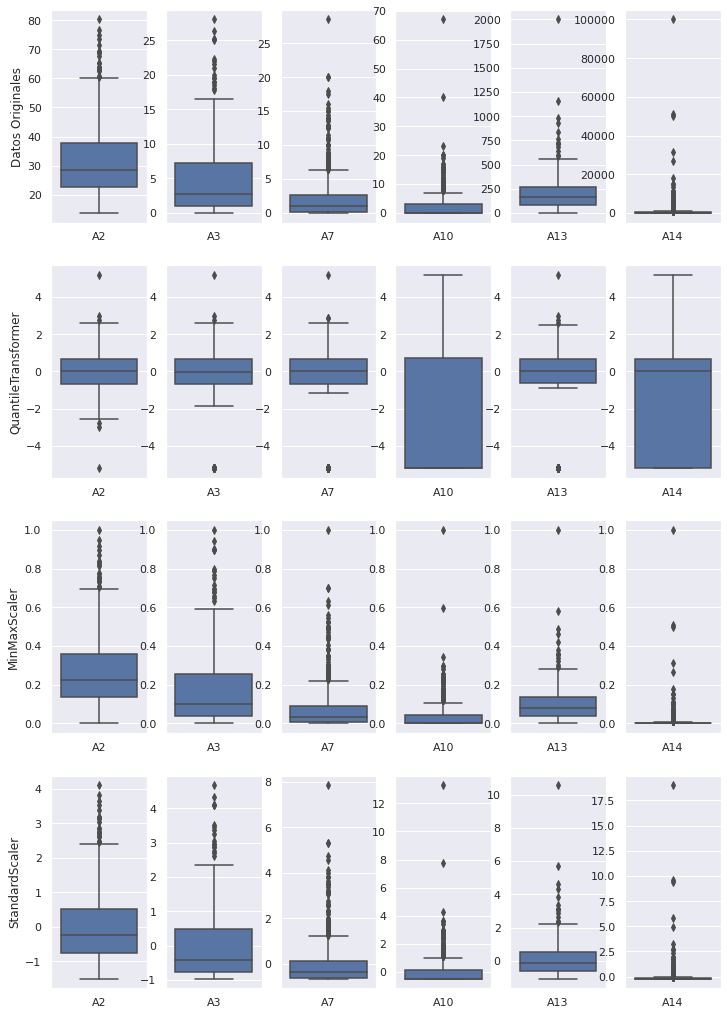

In [19]:
sns.set(rc={"figure.figsize": (12, 18)})
fig, axes = plt.subplots(4, 6)

datos_copy = datos.copy()

scaler1 = QuantileTransformer(
    output_distribution="normal", n_quantiles=datos_copy.shape[0]
)
scaler2 = MinMaxScaler()
scaler3 = StandardScaler()

for k in range(0, 6):
    plt.subplot(4, 6, k + 1)
    col = datos_num_transf[k]
    Transf1 = datos_copy[col].values.reshape(-1, 1)
    sns.boxplot(data=Transf1).set_xticklabels([col])
    if k == 0:
        plt.ylabel("Datos Originales")

    plt.subplot(4, 6, k + 7)
    Transf2 = scaler1.fit_transform(datos_copy[col].values.reshape(-1, 1))
    sns.boxplot(data=Transf2).set_xticklabels([col])
    if k == 0:
        plt.ylabel(scaler1.__class__.__name__)

    plt.subplot(4, 6, k + 13)
    Transf3 = scaler2.fit_transform(datos_copy[col].values.reshape(-1, 1))
    sns.boxplot(data=Transf3).set_xticklabels([col])
    if k == 0:
        plt.ylabel(scaler2.__class__.__name__)

    plt.subplot(4, 6, k + 19)
    Transf4 = scaler3.fit_transform(datos_copy[col].values.reshape(-1, 1))
    sns.boxplot(data=Transf4).set_xticklabels([col])
    if k == 0:
        plt.ylabel(scaler3.__class__.__name__)

# Despliega la figura con las 10 gráficas
plt.show()


- A partir de estas transformaciones decidimos utilizar la tranformación Quantile en nuestro pipeline para las variables numéricas, seguida de un scalador MinMax para que todas las variables tengan la misma escala entre 0 y 1

In [20]:
# En esta sección de código definimos las transformaciones
# ========================================================
# Transformaciones a factores categóricos

cat_pipeline = Pipeline(
    steps=[
        ("impModa", SimpleImputer(strategy="most_frequent")),
        ("OneHotE", OneHotEncoder(handle_unknown="ignore")),
    ]
)
cat_pipeline_nombres = datos_cat

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(
    steps=[
        ("impMediana", SimpleImputer(strategy="median")),
        # ("log", FunctionTransformer(np.log1p)),
        ("quantile", QuantileTransformer(output_distribution="normal")),
        ("escalaMinMax", MinMaxScaler()),
    ]
)
num_pipeline_nombres = datos_cnt

# Conjuntamos las transformaciones que se aplicarán a los datos de entrada:
columnasTransformer = ColumnTransformer(
    transformers=[
        ("catpipe", cat_pipeline, cat_pipeline_nombres),
        ("numpipe", num_pipeline, num_pipeline_nombres),
    ],
    remainder="passthrough",
)


# **Ejercicio-3.**
## *Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?*

- Se requiere utilizar una una estrategia [stratified] por la cantidad de variables de entrada que se manejan en el modelo [14], requerimos de muestras que estén transformadas de la misma forma que se limpiaron los datos de entrada (One-hot encoder). Por ello Stratified es el método más adecuado para obtener dummies independientes y distribuidos equitativamente.

In [21]:
# Funciones para generar scores
def accuracy(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    vp = cm[1, 1]
    vn = cm[0, 0]

    score = (vp + vn) / tot

    return score


def precision(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fp = cm[0, 1]
    vp = cm[1, 1]

    if (vp + fp) == 0:
        score = 0
    else:
        score = vp / (vp + fp)

    return score


def recall(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fn = cm[1, 0]
    vp = cm[1, 1]

    if (vp + fn) == 0:
        score = 0
    else:
        score = vp / (vp + fn)

    return score


def f1(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fp = cm[0, 1]
    fn = cm[1, 0]
    vp = cm[1, 1]

    if 2 * vp + fp + fn == 0:
        score = 0
    else:
        score = 2 * vp / (2 * vp + fp + fn)

    return score


def gmean(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    vn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    vp = cm[1, 1]

    if (vp + fn) == 0 or (vn + fp) == 0:
        score = 0
    else:
        recall = vp / (vp + fn)
        specifity = vn / (vn + fp)
        score = np.sqrt(recall * specifity)

    return score


In [22]:
#### ¿Ocupamos las variables después de normalizarlas con el pipeline (column transformer)?

X_val_dummy, X_train_dummy, Y_val_dummy, Y_train_dummy = train_test_split(
    X_train, Y_train, train_size=0.25, stratify=Y_train, random_state=0
)  # realizamos la partición.

modeloDummy = (
    DummyClassifier()
)  # estrategia default es mean, siempre se predice la media de los datos de entrenamiento

modeloDummy.fit(
    X_train_dummy, Y_train_dummy
)  # entrenamos con los conjuntos de entrenamiento

yhat_train_dummy = modeloDummy.predict(X_train_dummy)
yhat_val_dummy = modeloDummy.predict(X_val_dummy)

print(
    "===============================\nDUMMY Classifier:\n==============================="
)
print("ENTRENAMIENTO:")
print("Confusion matrix:\n", confusion_matrix(Y_train_dummy, yhat_train_dummy))
print("Accuracy: ", accuracy(Y_train_dummy, yhat_train_dummy))
print("F1-score: ", f1(Y_train_dummy, yhat_train_dummy))
print("Precision: ", precision(Y_train_dummy, yhat_train_dummy))
print("Recall: ", recall(Y_train_dummy, yhat_train_dummy))

print("\nVALIDACION:")
print("Confusion matrix:\n", confusion_matrix(Y_val_dummy, yhat_val_dummy))
print("Accuracy: ", accuracy(Y_val_dummy, yhat_val_dummy))
print("F1-score: ", f1(Y_val_dummy, yhat_val_dummy))
print("Precision: ", precision(Y_val_dummy, yhat_val_dummy))
print("Recall: ", recall(Y_val_dummy, yhat_val_dummy))


DUMMY Classifier:
ENTRENAMIENTO:
Confusion matrix:
 [[244   0]
 [196   0]]
Accuracy:  0.5545454545454546
F1-score:  0.0
Precision:  0
Recall:  0.0

VALIDACION:
Confusion matrix:
 [[81  0]
 [65  0]]
Accuracy:  0.5547945205479452
F1-score:  0.0
Precision:  0
Recall:  0.0


# **Ejercicio-4.**
## *Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio anterior.* 

In [23]:
mi_modelo_svm = SVC(random_state=45, probability=True)  # Creamos el modelo
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=45)  # k-folds cross-validation
gamma = list(np.logspace(-2, 2, 3))
gamma.extend(["scale", "auto"])

dicc_grid = {
    "C": np.logspace(
        -2, 2, 3
    ),  # [10^-5, 10^-4, 10^-3, 10^-2, 0.1, 1, 10, 10^3, 10^4, 10^5]
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": gamma,
}

# dicc_grid = {'C': np.logspace(-2, 2, 5),
#              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#             }


# ================================================
scores = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "gmean": gmean,
}

all_results = {
    k: [] for k in scores.keys()
}  # save results on each metric for each model
best_models = {k: None for k in scores.keys()}  # save the best models estimators

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)

for k, v in scores.items():
    grid = GridSearchCV(
        estimator=mi_modelo_svm,
        param_grid=dicc_grid,
        scoring=make_scorer(v),
        cv=cv,
        n_jobs=-1,
    )

    grid.fit(Xx, np.ravel(Y_train))

    print(f"----Mejor modelo para score {k}----")

    print(f"Mejor valor de score {k}:", grid.best_score_)
    print(
        "Mejor combinación de valores encontrados de los hiperparámetros:",
        grid.best_params_,
    )
    print("Métrica utilizada:", grid.scoring)

    mejor_modelo_svm = grid.best_estimator_  # Get the best estimator (SVM model)
    best_models[k] = mejor_modelo_svm  # Save this best estimator in dictionary
    yhat_train = mejor_modelo_svm.predict(Xx)  # Predict for the complete train set
    # Calculate each metric and save it
    for s, f in scores.items():
        all_results[s].append(f(Y_train, yhat_train))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (586). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


----Mejor modelo para score accuracy----
Mejor valor de score accuracy: 0.8561108696701919
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 100.0, 'gamma': 'auto', 'kernel': 'poly'}
Métrica utilizada: make_scorer(accuracy)
----Mejor modelo para score precision----
Mejor valor de score precision: 0.867633393438347
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1.0, 'gamma': 0.01, 'kernel': 'poly'}
Métrica utilizada: make_scorer(precision)
----Mejor modelo para score recall----
Mejor valor de score recall: 0.9347936169550851
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
Métrica utilizada: make_scorer(recall)
----Mejor modelo para score f1----
Mejor valor de score f1: 0.846597098654709
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
Métrica utilizada: make_scorer(f1)
----Mejor modelo para score gmean----
Mejor valor d

# **Ejercicio-5.**
## *Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. Incluye tus conclusiones.*

- Usamos validación cruzada para obtener métricas de entrenamiento y validación para el mejor modelo de cada una de las métricas requeridas y graficamos usando box plot para analizar que tan dispersas están las validaciones

TODAS LAS METRICAS PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA:  accuracy
ENTRENAMIENTO:
mean accuracy: 0.935 (0.0061)
mean precision: 0.930 (0.0073)
mean recall: 0.924 (0.0101)
mean f1: 0.927 (0.0063)
mean gmean: 0.934 (0.0061)

VALIDACION (interna al método de validación cruzada):
mean accuracy: 0.855 (0.0244)
mean precision: 0.844 (0.0563)
mean recall: 0.827 (0.0387)
mean f1: 0.834 (0.0310)
mean gmean: 0.852 (0.0233)



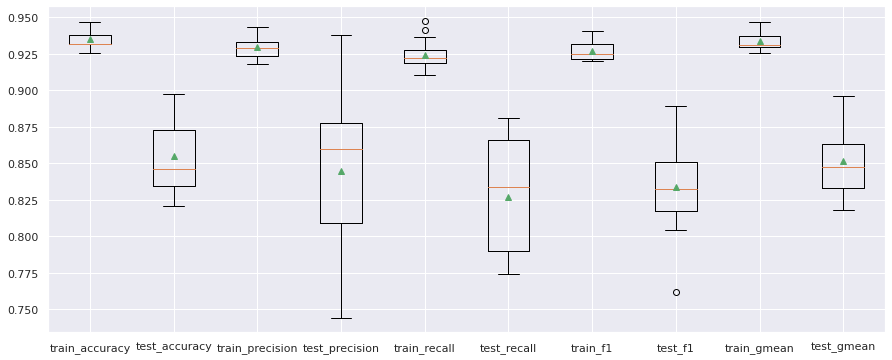

TODAS LAS METRICAS PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA:  precision
ENTRENAMIENTO:
mean accuracy: 0.662 (0.0113)
mean precision: 0.870 (0.0254)
mean recall: 0.284 (0.0155)
mean f1: 0.427 (0.0189)
mean gmean: 0.523 (0.0147)

VALIDACION (interna al método de validación cruzada):
mean accuracy: 0.662 (0.0451)
mean precision: 0.868 (0.1056)
mean recall: 0.283 (0.0608)
mean f1: 0.424 (0.0738)
mean gmean: 0.521 (0.0569)



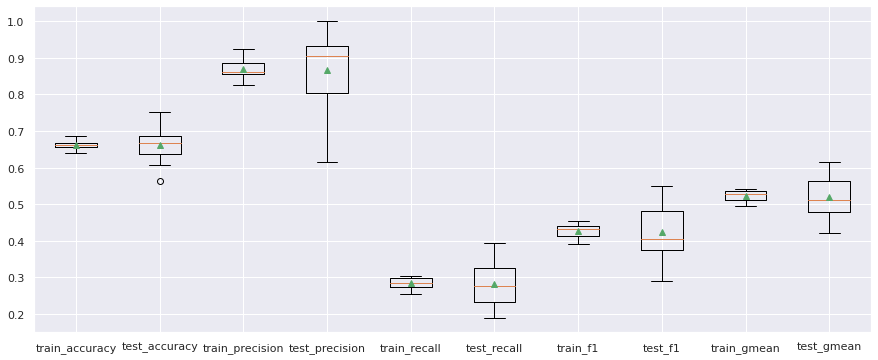

TODAS LAS METRICAS PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA:  recall
ENTRENAMIENTO:
mean accuracy: 0.850 (0.0089)
mean precision: 0.775 (0.0156)
mean recall: 0.935 (0.0074)
mean f1: 0.847 (0.0103)
mean gmean: 0.855 (0.0084)

VALIDACION (interna al método de validación cruzada):
mean accuracy: 0.850 (0.0367)
mean precision: 0.774 (0.0655)
mean recall: 0.935 (0.0283)
mean f1: 0.845 (0.0427)
mean gmean: 0.854 (0.0347)



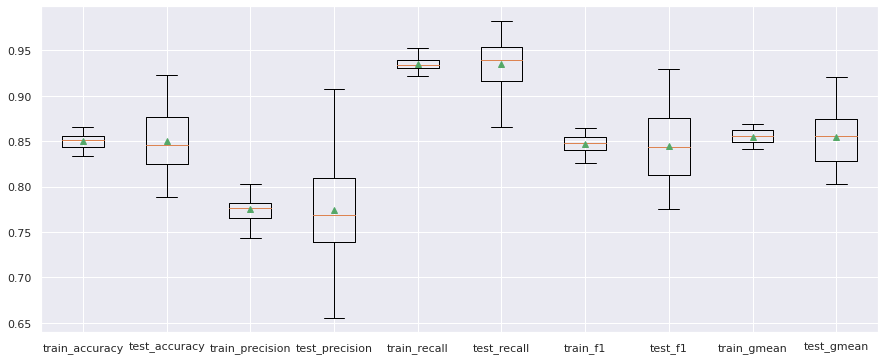

TODAS LAS METRICAS PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA:  f1
ENTRENAMIENTO:
mean accuracy: 0.853 (0.0082)
mean precision: 0.779 (0.0149)
mean recall: 0.935 (0.0074)
mean f1: 0.850 (0.0099)
mean gmean: 0.858 (0.0076)

VALIDACION (interna al método de validación cruzada):
mean accuracy: 0.852 (0.0376)
mean precision: 0.776 (0.0672)
mean recall: 0.935 (0.0283)
mean f1: 0.847 (0.0435)
mean gmean: 0.856 (0.0355)



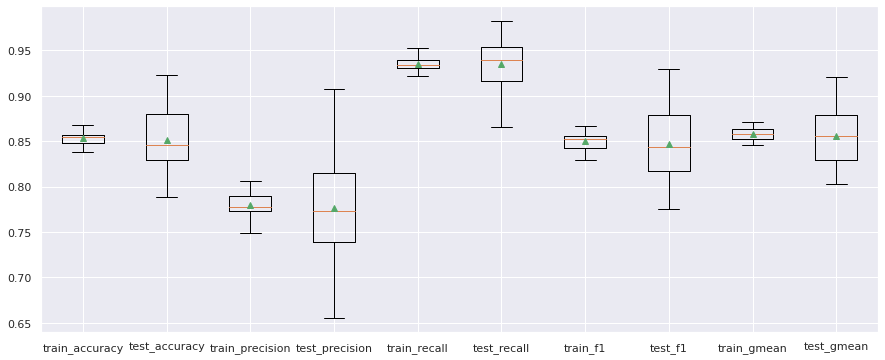

TODAS LAS METRICAS PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA:  gmean
ENTRENAMIENTO:
mean accuracy: 0.853 (0.0082)
mean precision: 0.779 (0.0149)
mean recall: 0.935 (0.0074)
mean f1: 0.850 (0.0099)
mean gmean: 0.858 (0.0076)

VALIDACION (interna al método de validación cruzada):
mean accuracy: 0.852 (0.0376)
mean precision: 0.776 (0.0672)
mean recall: 0.935 (0.0283)
mean f1: 0.847 (0.0435)
mean gmean: 0.856 (0.0355)



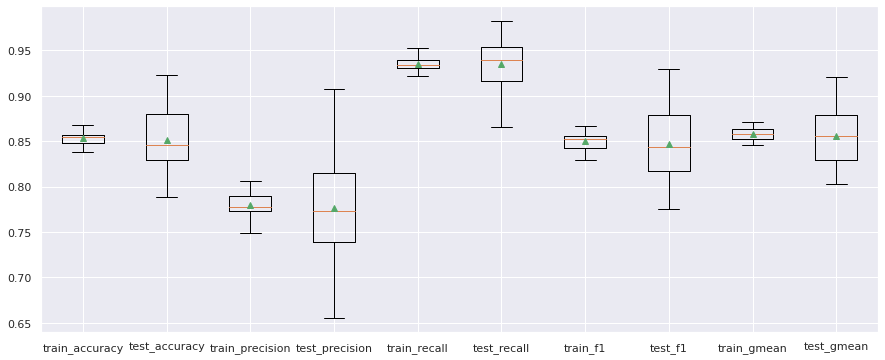

In [24]:

sns.set(rc={'figure.figsize':(15,6)})

metricas = {
    "accuracy": make_scorer(accuracy),
    "precision": make_scorer(precision),
    "recall": make_scorer(recall),
    "f1": make_scorer(f1),
    "gmean": make_scorer(gmean),
}

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=45) # k-folds cross-validation
delta_train_sz = np.linspace(0.05, 1, 20)

# Iterate over best models for each metric
for metrica_element, metrica_scorer in metricas.items():

    pipeline = Pipeline(
        steps=[("ct", columnasTransformer), ("m", best_models[metrica_element])]
    )
    
    resultados = cross_validate(pipeline, X_train, Y_train, scoring=metricas, cv=cv, return_train_score=True, n_jobs=-1)

    print('==============================================================================================')
    print('TODAS LAS METRICAS PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA: ', metrica_element)
    print('==============================================================================================')
    print('ENTRENAMIENTO:')
    print('mean accuracy: %.3f (%.4f)\nmean precision: %.3f (%.4f)\nmean recall: %.3f (%.4f)\nmean f1: %.3f (%.4f)\nmean gmean: %.3f (%.4f)\n' % (
                                                                          np.mean(resultados['train_accuracy']),
                                                                          np.std(resultados['train_accuracy']),
                                                                          np.mean(resultados['train_precision']),
                                                                          np.std(resultados['train_precision']), 
                                                                          np.mean(resultados['train_recall']),
                                                                          np.std(resultados['train_recall']),
                                                                          np.mean(resultados['train_f1']),
                                                                          np.std(resultados['train_f1']),
                                                                          np.mean(resultados['train_gmean']),
                                                                          np.std(resultados['train_gmean']),
                                                                          ))
    
    print('VALIDACION (interna al método de validación cruzada):')
    print('mean accuracy: %.3f (%.4f)\nmean precision: %.3f (%.4f)\nmean recall: %.3f (%.4f)\nmean f1: %.3f (%.4f)\nmean gmean: %.3f (%.4f)\n' % (
                                                                          np.mean(resultados['test_accuracy']),
                                                                          np.std(resultados['test_accuracy']),
                                                                          np.mean(resultados['test_precision']),
                                                                          np.std(resultados['test_precision']), 
                                                                          np.mean(resultados['test_recall']),
                                                                          np.std(resultados['test_recall']),
                                                                          np.mean(resultados['test_f1']),
                                                                          np.std(resultados['test_f1']),
                                                                          np.mean(resultados['test_gmean']),
                                                                          np.std(resultados['test_gmean']),
                                                                          ))
    

    bp_scores = list()
    labels = list()

    for k, v in metricas.items():
      rr = resultados['train_'+k]
      bp_scores.append(rr)
      rr = resultados['test_'+k]
      bp_scores.append(rr)
      labels.append('train_'+k)
      labels.append('test_'+k)

    plt.boxplot(bp_scores, labels=labels, showmeans=True)

    plt.show()

- Al observar los diagramas de caja y bigote encontramos que las métricas que al momento de maximizar su desempeño mostraron los mejores resultados fueron: 

- Accuracy 
- Recall 

- Si únicamente comparamos la resolución de [Y] obtendremos:  Accuracy (0.75- 0.95) VS Recall (0.65 - 0.95) aparentemente el primero tiene rangos con mejores resultados pero al poner atención en los cuartiles, encontramos que la varianza de Recall es menor. Podemos concluir que si utilizamos esta métrica para maximizar los hiper parámetros obtendremos los siguientes:'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'
- Esta conclusión la corroboramos cuando observamos las curvas de entrenamniento en el Ejercicio 6.

# **Ejercicio-6.**
## *Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno de estos problemas.*

- Para este punto necesitamos primero definir la función para graficar la curva de aprendizaje. Esta la copiamos de la actividad pasada de árbol de decisión, con la adición de poder pasar el título como un parámetro. Esto debido a que estaremos graficando las curvas de aprendizaje para el mejor modelo obtenido por cada métrica requerida por la actividad

In [28]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, eje_y, titulo):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq)
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores.
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7, 6))
    plt.plot(
        train_sizes,
        train_mean,
        color="blue",
        marker="o",
        markersize=5,
        label="Training",
    )
    plt.fill_between(
        train_sizes,
        train_mean + train_std,
        train_mean - train_std,
        alpha=0.1,
        color="blue",
    )

    plt.plot(
        train_sizes,
        val_mean,
        color="red",
        marker="+",
        markersize=5,
        linestyle="--",
        label="Validation",
    )
    plt.fill_between(
        train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color="red"
    )

    plt.title(titulo)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel(eje_y)
    plt.grid()
    plt.legend(loc="lower left")
    plt.show()


---------------------------------------------------------


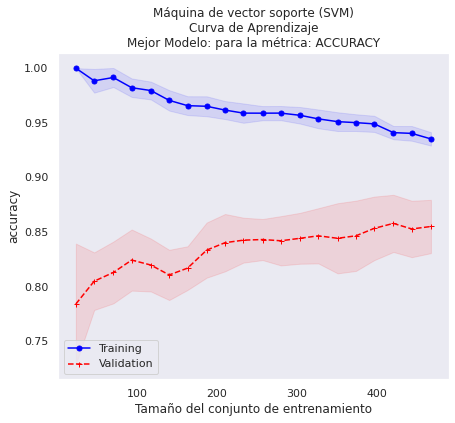

---------------------------------------------------------


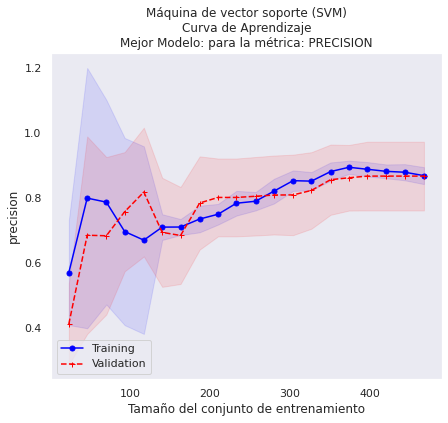

---------------------------------------------------------


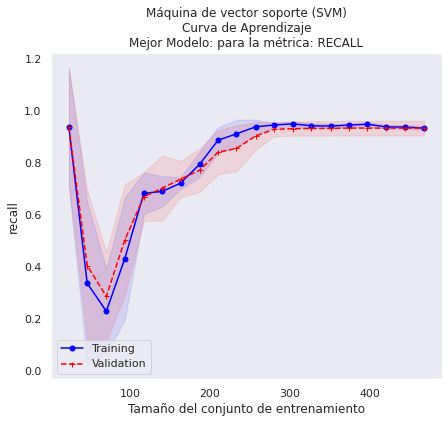

---------------------------------------------------------


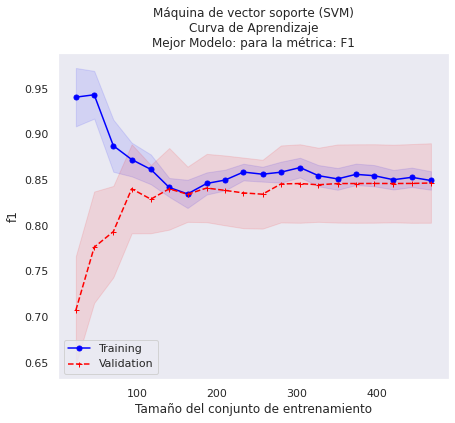

---------------------------------------------------------


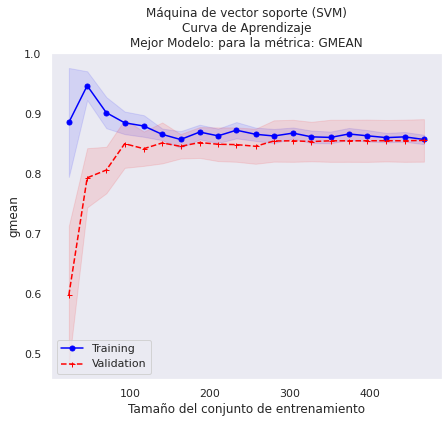

In [29]:
delta_train_sz = np.linspace(0.05, 1, 20)

metricas = {
    "accuracy": make_scorer(accuracy),
    "precision": make_scorer(precision),
    "recall": make_scorer(recall),
    "f1": make_scorer(f1),
    "gmean": make_scorer(gmean),
}


for metrica_element, metrica_scorer in metricas.items():

    pipeline = Pipeline(
        steps=[("ct", columnasTransformer), ("m", best_models[metrica_element])]
    )

    tr_sizes, tr_scores, val_scores = learning_curve(
        estimator=pipeline,
        X=X_train,
        y=Y_train,
        scoring=metrica_scorer,  # metricas["accuracy"],#make_scorer(f1),
        cv=cv,
        train_sizes=delta_train_sz,
        random_state=45,
        n_jobs=-1,
    )

    # Obtenemos el gráfico con las curvas de aprendizaje:
    print("---------------------------------------------------------")

    mi_LearningCurvePlot(
        tr_sizes,
        tr_scores,
        val_scores,
        metrica_element,
        "Máquina de vector soporte (SVM)\nCurva de Aprendizaje\nMejor Modelo: para la métrica: "
        + metrica_element.upper(),
    )


# **Ejercicio-7.**
## *Con los mejores hiperparámetros encontrados encontrar la gráfica de la curva ROC y su área bajo la curva.*

- Con un ciclo parecido al usado en el Ejercicio anterior, graficando las curvas ROC y se calcula en área bajo la curva para el mejor modelo obtenido por cada métrica requerida por la actividad

CURVA ROC y AUC PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA:  accuracy


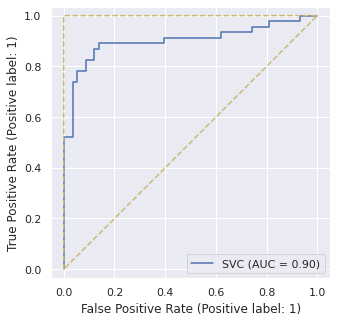

CURVA ROC y AUC PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA:  precision


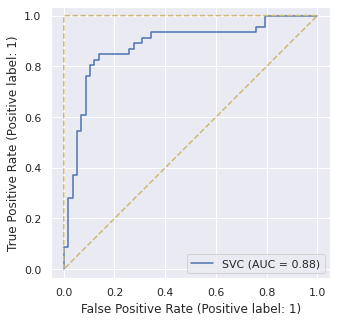

CURVA ROC y AUC PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA:  recall


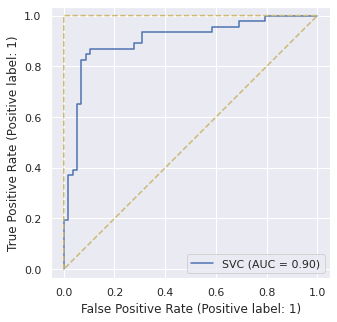

CURVA ROC y AUC PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA:  f1


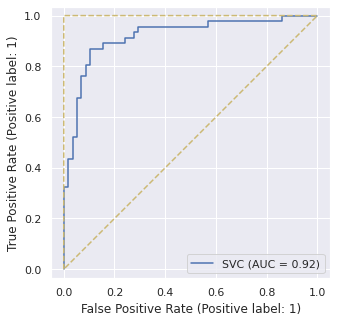

CURVA ROC y AUC PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA:  gmean


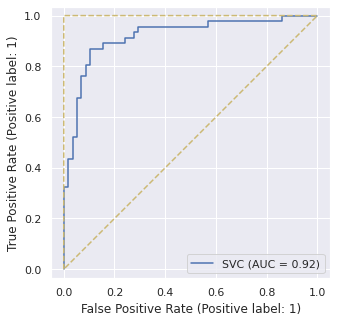

In [30]:
sns.set(rc={"figure.figsize": (5, 5)})

#Con esto ignoramos los warnings del número de quantiles:
warnings.filterwarnings('ignore')
Xxtest = columnasTransformer.fit_transform(X_test)
warnings.resetwarnings

for metrica_element, metrica_scorer in metricas.items():
    print('====================================================================================')
    print('CURVA ROC y AUC PARA EL MEJOR MODELO OBTENIDO USANDO LA METRICA: ', metrica_element)
    print('====================================================================================')
    svm_curve = RocCurveDisplay.from_estimator(best_models[metrica_element], Xxtest, Y_test)

    plt.plot([0, 0, 1, 0], [0, 1, 1, 0], "y--")

    plt.axis("equal")
    plt.show()


# **Ejercicio-8.**
## *Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score.*

In [31]:
# Para buscar el mejor treshold

# regresa los TP para un umbral deseado:


def fun_thTPrate(th, modelo, x, y):
    p = modelo.predict_proba(x)  # shape (231x2)
    my1s = y == 1
    pred1s = p[my1s][:, 1]
    return sum(pred1s > th) / sum(my1s)


# Análogo ahora con los FP:


def fun_thFPrate(th, modelo, x, y):
    p = modelo.predict_proba(x)
    my0s = y == 0
    pred0s = p[my0s][:, 1]
    return sum(pred0s > th) / sum(my0s)


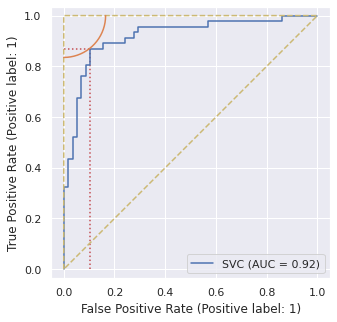

In [32]:
# Buscamos el mejor umbral que logre el conjunto mínimo de FP y TP

mejor_modelo_svm_f1 = best_models["f1"]

new_th = 0.103  # búsquda del mejor umbral que minimiza el total FP+FN.
rr = 0.165  # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, mejor_modelo_svm_f1, Xxtest, Y_test)
new_FPrate = fun_thFPrate(new_th, mejor_modelo_svm_f1, Xxtest, Y_test)

RocCurveDisplay.from_estimator(mejor_modelo_svm_f1, Xxtest, Y_test)
plt.plot([0, 0, 1, 0], [0, 1, 1, 0], "y--")
plt.hlines(new_TPrate, 0, new_FPrate, colors="r", linestyles="dotted")
plt.vlines(new_FPrate, 0, new_TPrate, colors="r", linestyles="dotted")

# graficando el pedazo de cícrulo:
an = np.linspace(1.5 * np.pi, 2 * np.pi, 20)
plt.plot(rr * np.cos(an), rr * np.sin(an) + 1)
plt.axis("equal")
plt.show()


In [33]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype("int")


In [34]:
yhat = mejor_modelo_svm_f1.predict_proba(Xxtest)
probs = yhat[:, 1]

f1(Y_test, to_labels(probs, new_th))


0.8695652173913043

- Con este nuevo threshold obtenemos un F1-score de 0.8695 con el conjunto de prueba, lo que mejora el F1-score obtenido con el threshold por defecto de 0.5 que era 0.8465 con el conjunto de entrenamiento


# **Ejercicio-9.**
## *Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica gmean.*

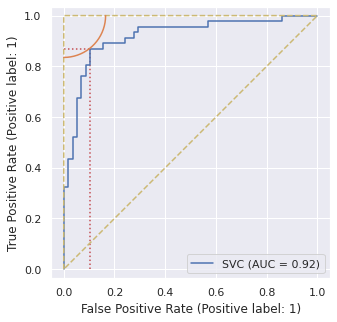

In [35]:
# Buscamos el mejor umbral que logre el conjunto mínimo de FP y TP

mejor_modelo_svm_gmean = best_models["gmean"]

new_th = 0.103  # búsquda del mejor umbral que minimiza el total FP+FN.
rr = 0.165  # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, mejor_modelo_svm_gmean, Xxtest, Y_test)
new_FPrate = fun_thFPrate(new_th, mejor_modelo_svm_gmean, Xxtest, Y_test)

RocCurveDisplay.from_estimator(mejor_modelo_svm_gmean, Xxtest, Y_test)
plt.plot([0, 0, 1, 0], [0, 1, 1, 0], "y--")
plt.hlines(new_TPrate, 0, new_FPrate, colors="r", linestyles="dotted")
plt.vlines(new_FPrate, 0, new_TPrate, colors="r", linestyles="dotted")

# graficando el pedazo de cícrulo:
an = np.linspace(1.5 * np.pi, 2 * np.pi, 20)
plt.plot(rr * np.cos(an), rr * np.sin(an) + 1)
plt.axis("equal")
plt.show()


In [37]:
yhat = mejor_modelo_svm_gmean.predict_proba(Xxtest)
probs = yhat[:, 1]

gmean(Y_test, to_labels(probs, new_th))


0.8829553753744006

- Con este nuevo threshold obtenemos un gmean de 0.8829 para el conjunto de prueba, lo que mejora el gmean obtenido con el threshold por defecto de 0.5 que era 0.8561 con el conjunto de entrenamiento


# **Ejercicio-10.**
## *Incluye tus conclusiones finales de la actividad.*

- Al momento de decidir el modelo de aprendizaje e hiper parámetros, debemos de entender el contexto del problema y la importancia de los resultados en la matriz de confusión. Al analizar el caso de un banco, asumimos que como institución no le conviene asignar créditos a clientes que no pueden pagarlos, 
por ello es importante disminuir los falsos positivos . Pero no hay una regla escrita sobre cuál métrica utilizar, todo cae en la necesidades y objetivos del proyecto. Como vimos en esta tarea, las visualizaciones gráficas aportan información que de otra forma sería complicado asimilar.
- Un aspecto muy importante a tener en cuenta, y que no habíamos practicado en actividades pasadas, es el ajuste del umbral del modelo, lo cual nos permite ajustar las respuesta del modelo de manera que minimice el costo para la empresa una vez se ponga el modelo en producción.

# **BIBLIOGRAFIA:**



- Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O’Reilly Media, Inc.
- Aprilliant, A., (1 de Enero de 2021). Optimal Threshold for Imbalanced Classification. Towards Data Science website. https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293
- scikit-learn.org. (s.f.). sklearn.preprocessing.quantile_transform. scikit-learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html


###**Fin de la Actividad de la semana 8.**